In [1]:
import sys
sys.path.append('../../../vysxd')
import numpy as np
import matplotlib.pyplot as plt
from FPC_define import *

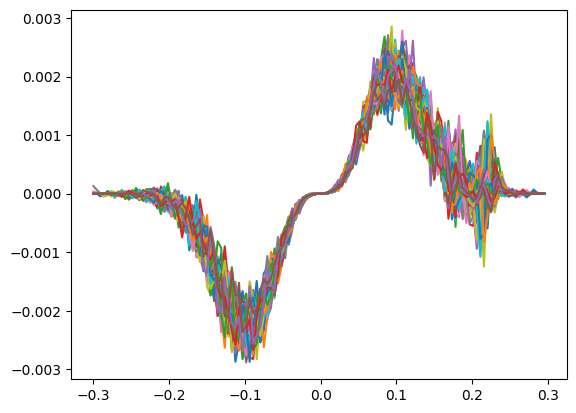

In [12]:
p1x1 = vysxd_get_data('EPW-alves/MS/PHA/p1x1/electrons/p1x1-electrons-000100.h5')

dfdv = np.gradient(p1x1.DATA,axis=0)
v_squared = np.array([p1x1.Y**2]*len(p1x1.X))
plt.plot(p1x1.Y,np.multiply(dfdv,np.transpose(v_squared)));

In [13]:
A, B = FPC('EPW-alves')

We are interested to see the energy transfer in velocity space, so we need to integrate over x

Alternatively, just pick an x position that you want to look at.

In [25]:
# A_int_wrt_x = np.trapz(A, axis = 0)
# B_int_wrt_x = np.trapz(B, axis = 0)

x_pos = 50
A_int_wrt_x = A[x_pos,:,:]
B_int_wrt_x = B[x_pos,:,:]


np.shape(A_int_wrt_x)

(128, 21)

Now, integrate over a couple timesteps such that the dissipative energy transfer overpowers the oscillatory

In [35]:
time_interval = [3,10]
A_full_int = np.trapz(A_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
B_full_int = np.trapz(B_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)

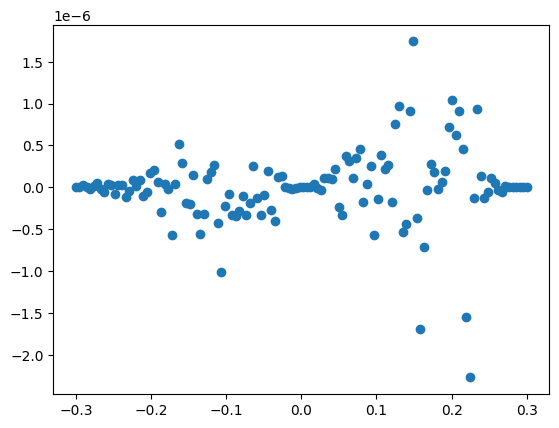

In [36]:
plt.scatter(np.linspace(-0.3,0.3, len(B_full_int)),B_full_int)  
# plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int)